<a href="https://colab.research.google.com/github/PrzemyslawSarnacki/NumericalMethods/blob/master/Rational.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate
from numpy.polynomial.polynomial import Polynomial
import math


In [2]:
x_arr = np.array([0, 5, 10,15], float)
y_arr = np.array([-1,0.5,1,0], float)

W celu przeskalowania wartości zastosujemy funkcję

In [3]:
def scale(x_, min_, max_):
    """
    scale x value in (min, max) range
    """
    return (x_ - min_) / (max_ - min_)


In [4]:
scale(x_arr, 0, 2*math.pi)

array([0.        , 0.79577472, 1.59154943, 2.38732415])

In [5]:
def trigonometric_coeffs(x_arr, y_arr):
    n = len(x_arr)
    # scale x_arr to match range (0, 2*pi)
    x_arr_scaled = scale(x_arr, 0, 2 * math.pi)
    Ak = (2 / n) * y_arr * np.cos(2 * x_arr_scaled)
    Bk = (2 / n) * y_arr * np.sin(2 * x_arr_scaled)
    return Ak, Bk

def uneven_fi(x_arr, y_arr, n):
    m = int(n - 1 / 2)
    x_arr_scaled = scale(x_arr, 0, 2 * math.pi)
    x_interval = np.linspace(x_arr_scaled.min(), x_arr_scaled.max())
    y_result = np.array([], float)
    A, B = trigonometric_coeffs(x_arr, y_arr)
    for xp in x_interval:
        yp = A[0] / 2
        for i in range(1, m):
            yp += A[i] * math.cos(i * xp) + B[i] * math.sin(i * xp)
        y_result = np.append(y_result, yp)
    return y_result


def even_fi(x_arr, y_arr, n):
    m = int(n / 2)
    x_arr_scaled = scale(x_arr, 0, 2 * math.pi)
    # get interval
    x_interval = np.linspace(x_arr.min(), x_arr.max())
    y_result = np.array([], float)
    A, B = trigonometric_coeffs(x_arr, y_arr)
    for xp in x_interval:
        # add A0
        yp = A[0] / 2
        # sum of coefficients multiplied
        for i in range(1, n - 1):
            yp += A[i] * math.cos(i * xp) + B[i] * math.sin(i * xp)
        # add Am
        yp += A[m] * math.cos((m) * xp) / 2
        y_result = np.append(y_result, yp)
    return y_result


def trigonometric(x_arr, y_arr):
    n = len(x_arr)
    # check if length is or uneven
    if n % 2 == 0:
        return even_fi(x_arr, y_arr, n)
    else:
        return uneven_fi(x_arr, y_arr, n)


Przetestujmy funkcję numeryczną

In [6]:
trigonometric(x_arr,y_arr)

array([-1.00454196, -0.80478687, -0.38446565,  0.12238392,  0.5467865 ,
        0.74480566,  0.64888093,  0.29196428, -0.2042744 , -0.67290457,
       -0.96113693, -0.98420576, -0.75430827, -0.37426027,  0.00164922,
        0.22521671,  0.20924625, -0.0402182 , -0.42611088, -0.79620514,
       -0.99953383, -0.94276864, -0.62593409, -0.14431385,  0.34432148,
        0.67543068,  0.73627048,  0.50615165,  0.06382368, -0.44068259,
       -0.83956719, -1.00678031, -0.90206038, -0.58365565, -0.18528504,
        0.13411747,  0.24946208,  0.11578791, -0.2151192 , -0.61383928,
       -0.92119014, -1.00738797, -0.82088092, -0.40895863,  0.09752435,
        0.52993842,  0.74170996,  0.66059111,  0.31447032, -0.17861197])

Sprawdźmy jak równanie będzie wyglądać w postaci symbolicznej:

In [7]:
import sympy as sym
x = sym.symbols("x")

def trigonometric_sym(x_arr, y_arr):
    n = len(x_arr)
    m = int(n / 2)
    x_arr_scaled = scale(x_arr, 0, 2 * math.pi)
    # get interval
    A, B = trigonometric_coeffs(x_arr, y_arr)
    # add A0
    yp = A[0] / 2
    # sum of coefficients multiplied
    for i in range(1, n - 1):
        yp += sym.expand(A[i] * sym.cos(i * x) + B[i] * sym.sin(i * x))
    # add Am
    yp += sym.expand(A[m] * sym.cos((m) * x) / 2)
    return yp

trigonometric_sym(x_arr, y_arr)


0.249946165515864*sin(x) - 0.0207471458492934*sin(2*x) - 0.00518790361478276*cos(x) - 0.749354055746009*cos(2*x) - 0.25

Przetestujmy funkcję symboliczną

In [8]:
def func(x_):
    return 0.249946165515864*math.sin(x_) - 0.0207471458492934*math.sin(2*x_) - 0.00518790361478276*math.cos(x_) - 0.749354055746009*math.cos(2*x_) - 0.25

In [9]:
func = np.vectorize(func)

In [10]:
interval = np.linspace(x_arr.min(), x_arr.max())

func(interval)

array([-1.00454196, -0.80478687, -0.38446565,  0.12238392,  0.5467865 ,
        0.74480566,  0.64888093,  0.29196428, -0.2042744 , -0.67290457,
       -0.96113693, -0.98420576, -0.75430827, -0.37426027,  0.00164922,
        0.22521671,  0.20924625, -0.0402182 , -0.42611088, -0.79620514,
       -0.99953383, -0.94276864, -0.62593409, -0.14431385,  0.34432148,
        0.67543068,  0.73627048,  0.50615165,  0.06382368, -0.44068259,
       -0.83956719, -1.00678031, -0.90206038, -0.58365565, -0.18528504,
        0.13411747,  0.24946208,  0.11578791, -0.2151192 , -0.61383928,
       -0.92119014, -1.00738797, -0.82088092, -0.40895863,  0.09752435,
        0.52993842,  0.74170996,  0.66059111,  0.31447032, -0.17861197])

Niestety i tym razem żadna z bibliotek nie wspiera Interpolacji Trygonometrycznej

Porównanie powyższych działań na wykresie 

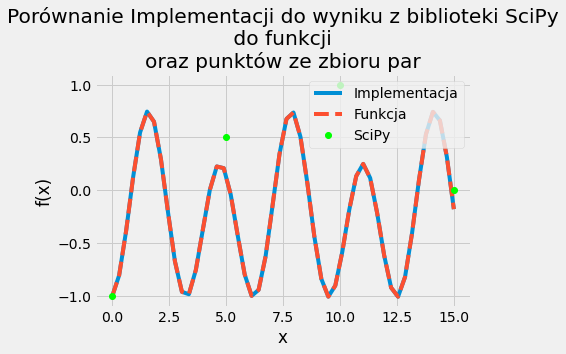

In [11]:
plt.style.use("fivethirtyeight")


plt.plot(interval, trigonometric(x_arr, y_arr))
plt.plot(interval, func(interval), linestyle="dashed")
plt.plot(x_arr, y_arr, "o", color="lime")
plt.title(
    "Porównanie Implementacji do wyniku z biblioteki SciPy\n do funkcji \noraz punktów ze zbioru par"
)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend(["Implementacja", "Funkcja", "SciPy", "Punkty"])

Jak widzimy wyniki z funkcją pokrywają się, lecz funkcja nie zawsze przechodzi przez punkty

Kalkulator ze strony https://demonstrations.wolfram.com/TrigonometricFittingAndInterpolation/ po dobraniu podobnych parametrów (ze względu na to, że jest to wersja beta jest ograniczony na ten moment zbiór możliwych kombinacji) podaje zbliżone rozwiązanie.